In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

In [65]:
df = pd.read_csv("HR_Analytics.csv") 

In [66]:
print(df.shape)
print(df.head())

(1480, 38)
   EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3             80                 

In [77]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   int64  
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   int64  
 3   Attrition                 1480 non-null   int64  
 4   BusinessTravel            1480 non-null   int64  
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   int64  
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   int64  
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   int64  
 14  H

In [78]:
print("\nDescribe:")
print(df.describe(include="all"))


Describe:
             EmpID          Age     AgeGroup    Attrition  BusinessTravel  \
count  1480.000000  1480.000000  1480.000000  1480.000000     1480.000000   
mean    733.669595    36.917568     1.638514     0.160811        2.494595   
std     423.179187     9.128559     0.946723     0.367481        0.934630   
min       0.000000    18.000000     0.000000     0.000000        0.000000   
25%     369.750000    30.000000     1.000000     0.000000        2.000000   
50%     729.500000    36.000000     2.000000     0.000000        3.000000   
75%    1099.250000    43.000000     2.000000     0.000000        3.000000   
max    1469.000000    60.000000     4.000000     1.000000        3.000000   

         DailyRate   Department  DistanceFromHome    Education  \
count  1480.000000  1480.000000       1480.000000  1480.000000   
mean    801.384459     1.261486          9.220270     2.910811   
std     403.126988     0.527669          8.131201     1.023796   
min     102.000000     0.000000

In [79]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears     

Attrition                      No        Yes
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.246122  13.753878
Sales                   79.333333  20.666667


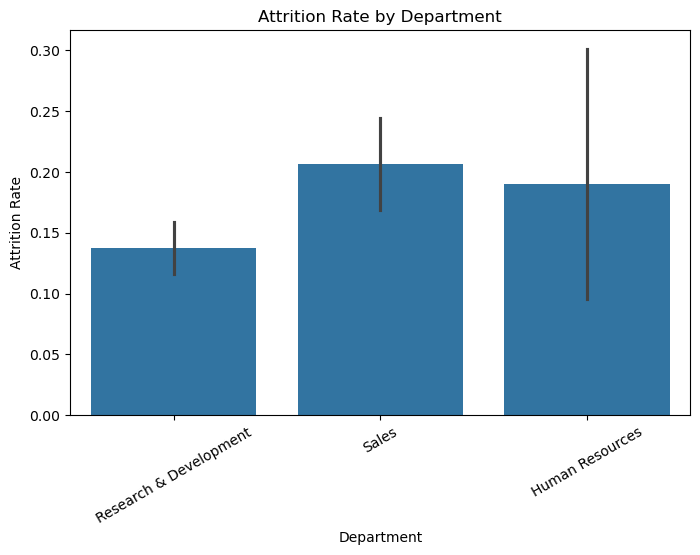

In [67]:
# Department wise Attrition
dept_attrition = df.groupby("Department")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
print(dept_attrition)

plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Department", y=df["Attrition"].apply(lambda x: 1 if x=="Yes" else 0))
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=30)
plt.show()

Attrition          No        Yes
SalarySlab                      
10k-15k     86.000000  14.000000
15k+        96.240602   3.759398
5k-10k      88.963964  11.036036
Upto 5k     78.353254  21.646746


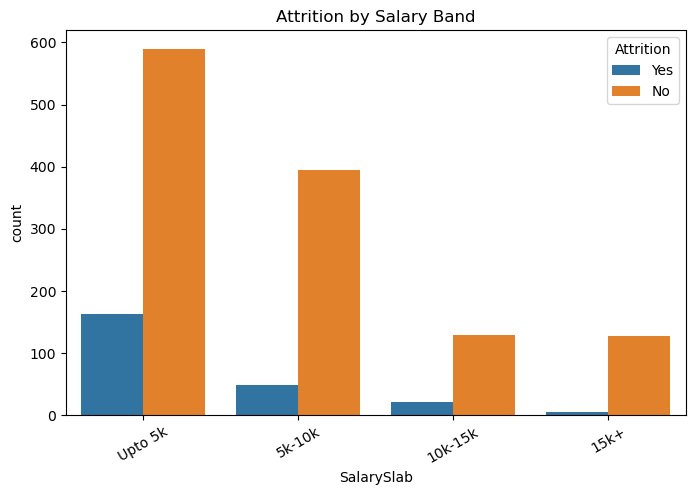

In [68]:
# Salary Bands vs Attrition
salary_attrition = df.groupby("SalarySlab")["Attrition"].value_counts(normalize=True).unstack().fillna(0) * 100
print(salary_attrition)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="SalarySlab", hue="Attrition")
plt.title("Attrition by Salary Band")
plt.xticks(rotation=30)
plt.show()

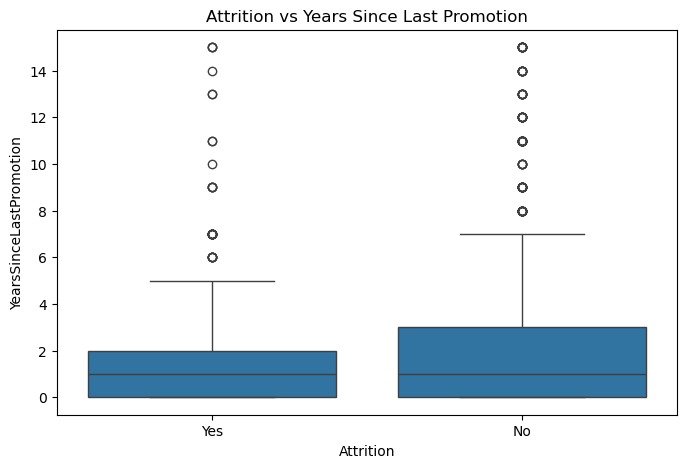

In [69]:
# Promotions (YearsSinceLastPromotion) vs Attrition
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Attrition", y="YearsSinceLastPromotion")
plt.title("Attrition vs Years Since Last Promotion")
plt.show()

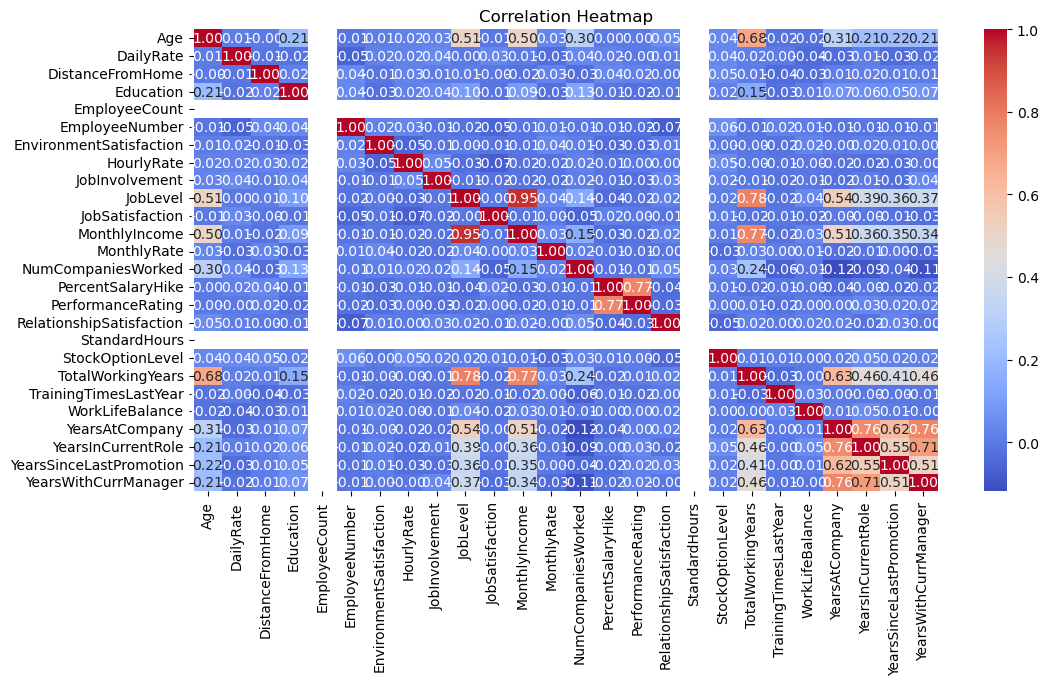

In [70]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

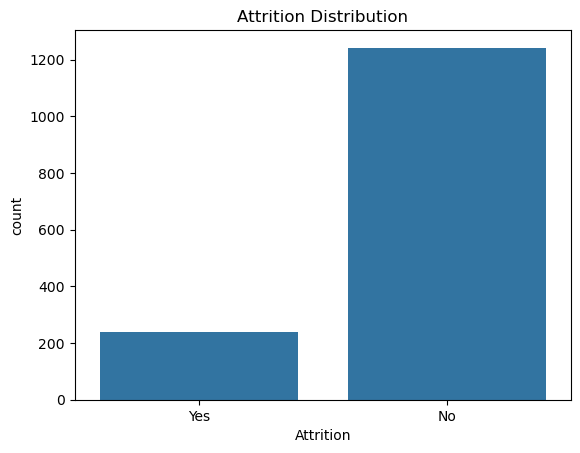

In [71]:
# Attrition count
sns.countplot(data=df, x="Attrition")
plt.title("Attrition Distribution")
plt.show()

In [72]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

# Define features (X) and target (y)
X = df.drop("Attrition", axis=1)   # all other columns
y = df["Attrition"]                # target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [73]:
# Handle missing values

imputer = SimpleImputer(strategy="most_frequent")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [74]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
log_reg.fit(X_train_imputed, y_train)
y_pred_lr = log_reg.predict(X_test_imputed)

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


=== Logistic Regression ===
Accuracy: 0.847972972972973
Confusion Matrix:
 [[238  11]
 [ 34  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.91       249
           1       0.54      0.28      0.37        47

    accuracy                           0.85       296
   macro avg       0.71      0.62      0.64       296
weighted avg       0.82      0.85      0.83       296



In [75]:
# Decision Tree Model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_imputed, y_train)
y_pred_dt = dt.predict(X_test_imputed)

print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


=== Decision Tree ===
Accuracy: 0.8074324324324325
Confusion Matrix:
 [[221  28]
 [ 29  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       249
           1       0.39      0.38      0.39        47

    accuracy                           0.81       296
   macro avg       0.64      0.64      0.64       296
weighted avg       0.81      0.81      0.81       296



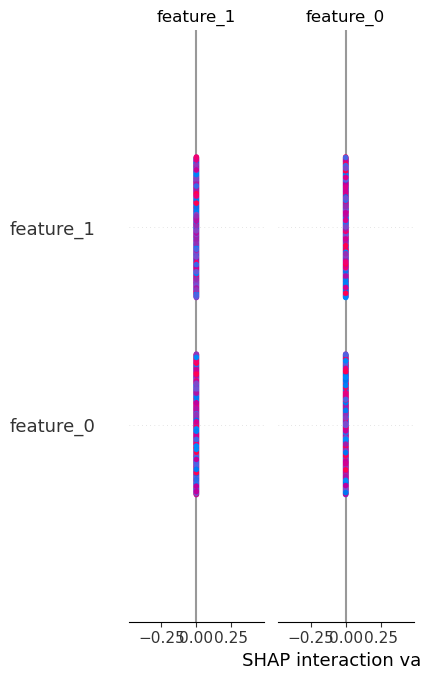

In [76]:
# Explainability with SHAP
if hasattr(X_train, 'columns'):
    feature_names = X_train.columns
else:
    feature_names = [f'feature_{i}' for i in range(X_test_imputed.shape[1])]

X_test_df = pd.DataFrame(X_test_imputed, columns=feature_names)
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test_df)
shap.summary_plot(shap_values, X_test_df, plot_type="bar")